# Analyzing the UncertaintyForest Class by Reproducing Conditional Entropy Estimates

This set of four tutorials (`uncertaintyforest_running_example.ipynb`, `uncertaintyforest_posteriorestimates.ipynb`, `uncertaintyforest_conditionalentropyestimates.ipynb`, and `uncertaintyforest_mutualinformationestimates.ipynb`) will explain the UncertaintyForest class. After following these tutorials, you should have the ability to run UncertaintyForest on your own machine and generate Figures 1, 2, and 3 from [this paper](https://arxiv.org/pdf/1907.00325.pdf), which help you to visualize a comparison of the estimated posteriors and conditional entropy values for several different algorithms. 

If you haven't seen it already, take a look at other tutorials to setup and install the ProgLearn package: `installation_guide.ipynb`.

*Goal: Run the UncertaintyForest class to produce a figure that compares estimated conditional entropy values for the UncertaintyForest, CART, and IRF algorithms, as in Figure 2 from [this paper](https://arxiv.org/pdf/1907.00325.pdf)*

## Import Required Packages

In [1]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

from proglearn.forest import UncertaintyForest
from functions.unc_forest_tutorials_functions import plot_fig2

## Specify Parameters

In [2]:
# The following are two sets of parameters.
# The first are those that were actually used to produce figure 2.
# These take a long time to actually run since there are up to 6000 data points.
# Below those, you'll find some scaled-down parameters so that you can see the results more quickly.

# Here are the paper reproduction parameters
# mus = [i * 0.5 for i in range(1, 11)]
# effect_size = 1
# d1 = 1
# d2 = 20
# n1 = 3000
# n2 = 6000
# num_trials = 20
# num_plotted_trials = 10
# sample_sizes_d1 = range(300, 1201, 90)
# sample_sizes_d2 = range(500, 3001, 250)

# Here are the scaled-down tutorial parameters
mus = [
    i * 0.5 for i in range(1, 3)
]  # range of means of the data (x-axis in right column)
effect_size = 1  # mu for left column
d1 = 1  # data dimensions = 1
d2 = 3  # data dimensions = 1, noise dimensions = 19
n1 = 100  # number of data points for top row, right column (d1)
n2 = 110  # number of data points for bottom row, right column (d2)
num_trials = 2  # number of trials to run
num_plotted_trials = 2  # the number of "fainter" lines to be displayed on the figure
sample_sizes_d1 = range(
    100, 120, 10
)  # range of data points for top row, left column (d1)
sample_sizes_d2 = range(
    100, 130, 10
)  # range of data points for bottom row, left column (d2)

## Specify Learners
Now, we'll specify which learners we'll compare (by label). Figure 2 uses three different learners, which are further specified in the function `estimate_ce`, which returns estimates of conditional entropy for a given dataset (X, y) and type of learner.

In [3]:
# Algorithms used to produce Figure 2
algos = [
    {"label": "CART", "title": "CART Forest", "color": "#1b9e77",},
    {"label": "IRF", "title": "Isotonic Reg. Forest", "color": "#fdae61",},
    {"label": "UF", "title": "Uncertainty Forest", "color": "#F41711",},
]

parallel = False

## Plot Figure 2

Finally, we'll run the code to obtain and plot the estimated conditional entropy vs. means and sample sizes (4 subplots).

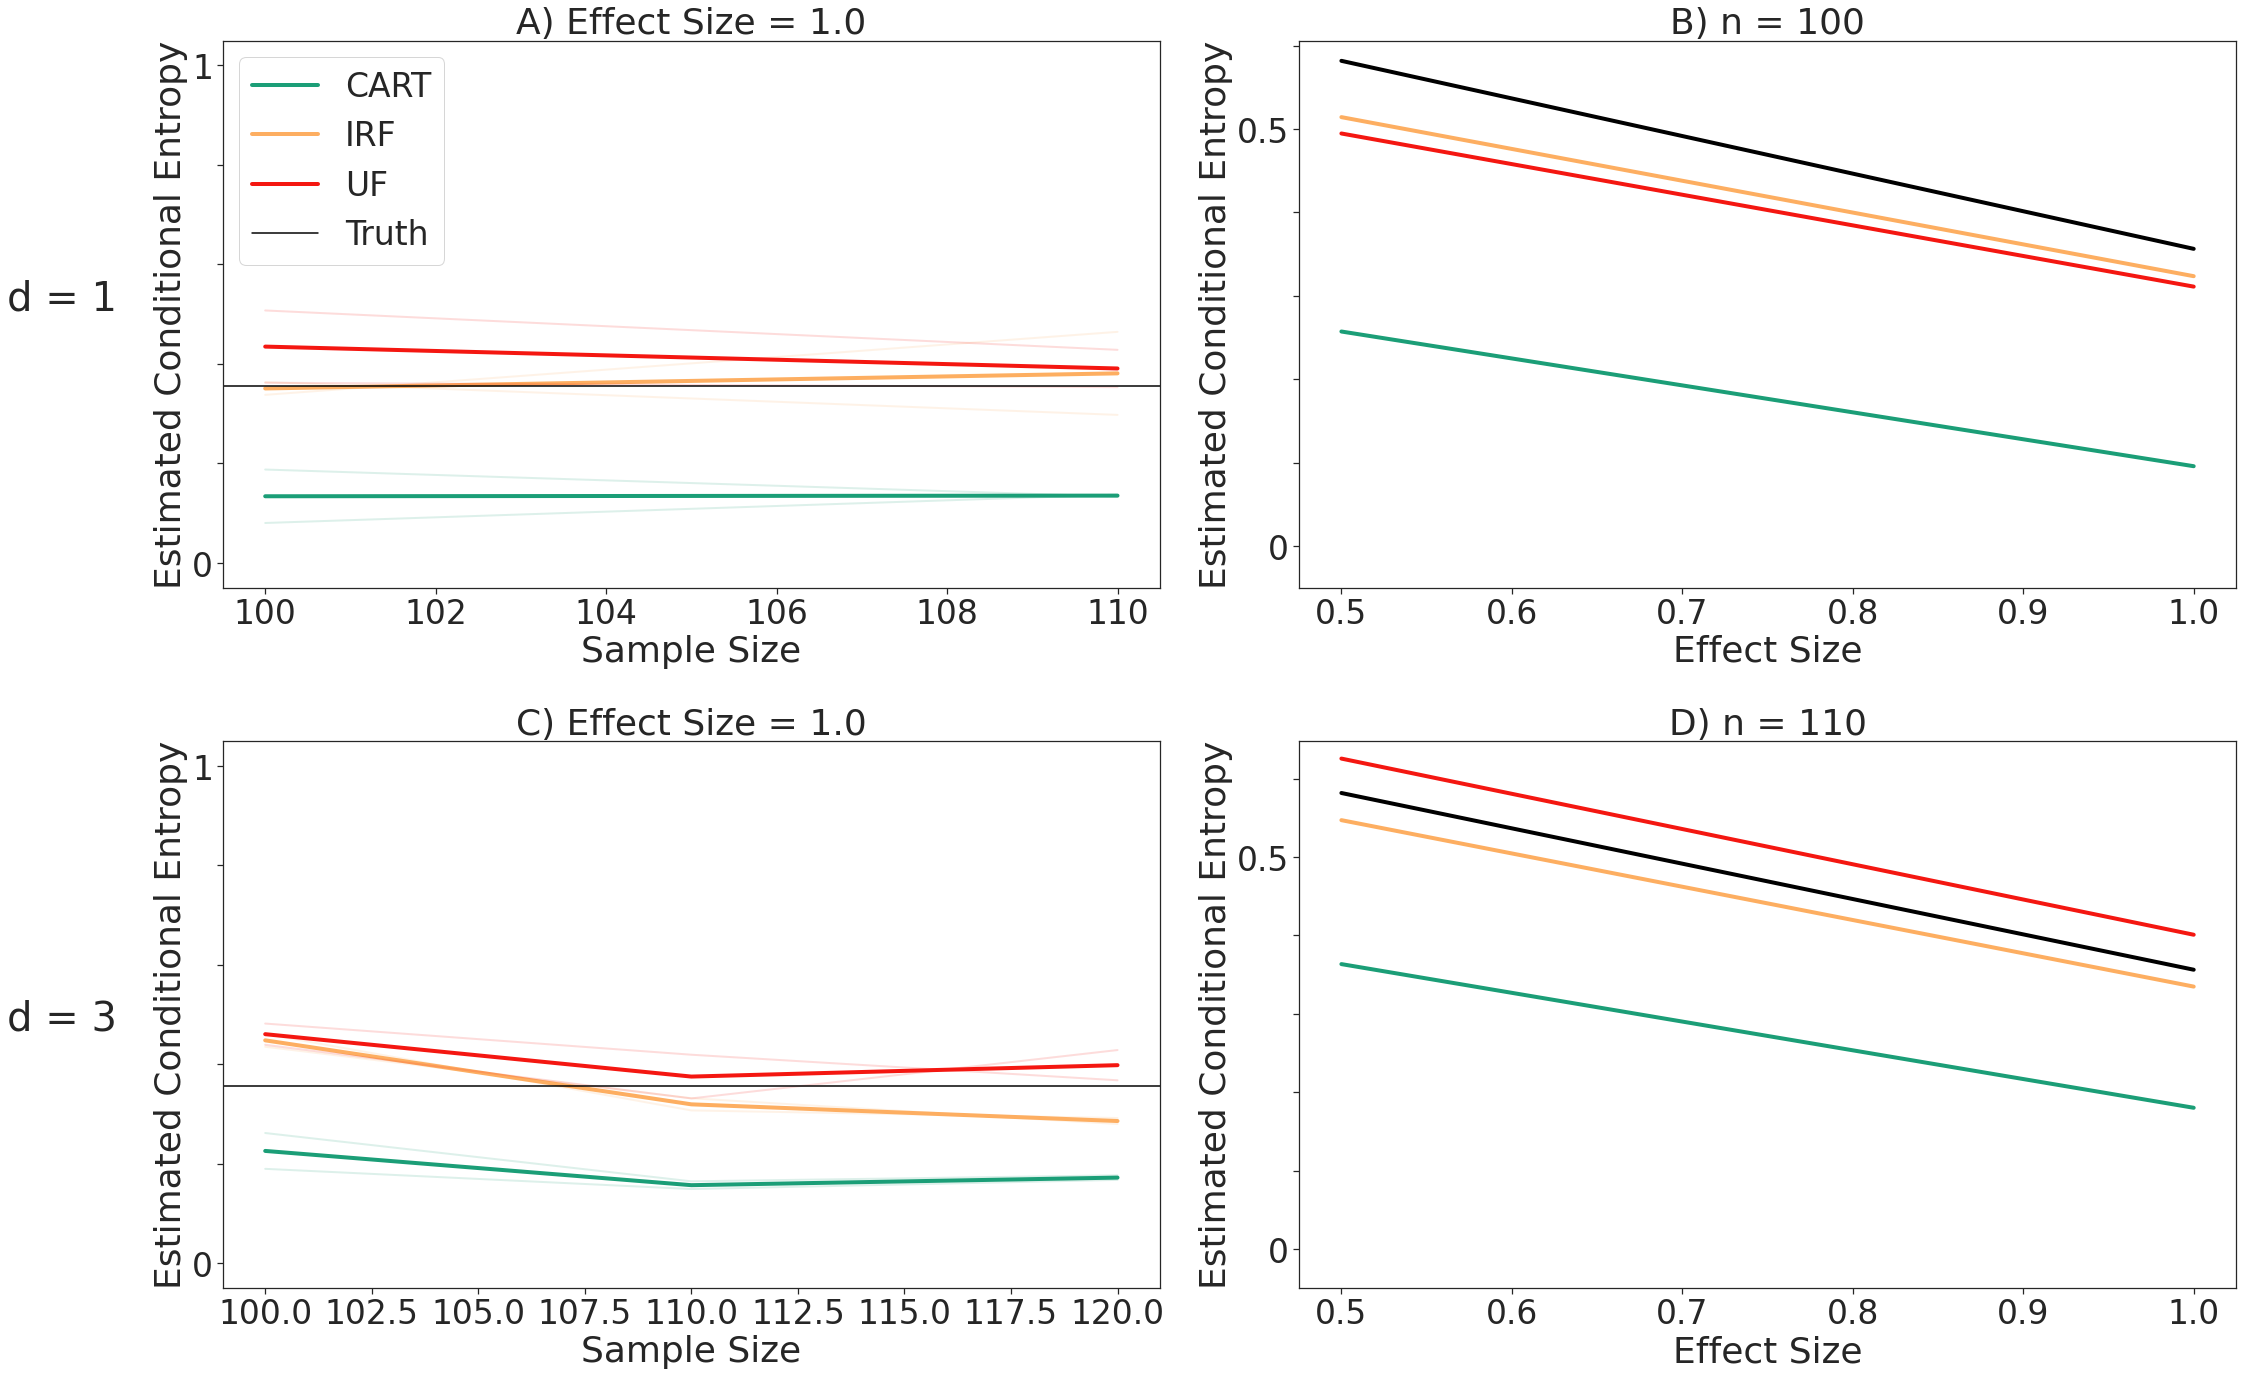

In [4]:
plot_fig2(
    num_plotted_trials,
    d1,
    d2,
    n1,
    n2,
    effect_size,
    algos,
    num_trials,
    sample_sizes_d1,
    sample_sizes_d2,
    mus,
    parallel=parallel,
)